In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.model_selection import train_test_split
import random
import csv

In [2]:
data_o = pd.read_csv(r'E:\python poroject\A_Z Handwritten Data\a-z.csv')
data_d = pd.read_csv('new_file.csv')

In [3]:
data_o.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_d.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
columns = data_o.columns

In [6]:
with open('a-z_modiefide_dataset.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(columns)
    writer.writerow(data_o[columns])
    writer.writerow(data_d[columns])

In [5]:
alfa = []
for i in range(ord('A') , ord('Z')):
    alfa.append(chr(i))
alfa

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , shuffle = True)

In [69]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(784,1)), 
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(26, activation=tf.nn.softmax), 
                                   ])
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 26)                13338     
Total params: 677,914
Trainable params: 677,914
Non-trainable params: 0
_________________________________________________________________


In [76]:
X_train /= 255
y_train /= 255
X_test /= 255
y_test /=255

In [78]:
model.fit(X_train , y_train)

MemoryError: Unable to allocate 1.52 GiB for an array with shape (260715, 784) and data type float64

In [29]:
np.shape(X_test.loc[C[0]])

(784,)

prediction :  P 
original :  P


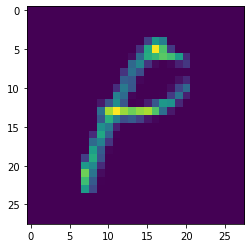

In [65]:
C = X_test.index
ran = random.choice(C)
prediction = model.predict(np.matrix(X_test.loc[ran]))
print('prediction : ' , alfa[np.argmax(prediction[0])] , '\noriginal : ' , alfa[y_test[ran]])
plt.imshow(np.matrix(X_test.loc[ran]).reshape(28,28))